# Data Analysis

## Table of Contents
* [Import Libraries](#chapter1)
    * [Import magic autoreload](#section_1_1)
    * [Import the libraries](#section_1_2)
    * [Import custom functions.](#section_1_3)
* [Data Analysis](#chapter2)
* [Inspect the Data](#chapter3)
* [Create new variables](chapter4)
* [Save the Data](#chapter5)


## Import Libraries: <a class="anchor" id="chapter1"></a>

Import the magic autoreload extension so that any changes in external python modules are automatically loaded. <a class="anchor" id="section_1_1"></a>

In [1]:
# autoreload 2
%load_ext autoreload
%autoreload 2

Import the libraries we will use in this notebook. <a class="anchor" id="section_1_2"></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Set the current working directory to the project folder.

In [3]:
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

In [4]:
from functions.funcs import *

Import the data: <a class="anchor" id="section_1_3"></a>

In [5]:
path = wd + "/data/"
for file in os.listdir(path):
    name = file.split(".")[0]
    globals()[name] = pd.read_csv(path + file)
    print(f"Created dataframe {blue}{name}{end} from {file}")

Created dataframe Basket from Basket.csv
Created dataframe Info from Info.csv
Created dataframe Mapping from Mapping.csv


In [6]:
print_cols(Info, 'Info')

Columns in Info are: 
	-customer_id, customer_name, customer_gender, customer_birthdate, kids_home, 
	-teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, 
	-typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, 
	-lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, 
	-year_first_transaction, loyalty_card_number, latitude, longitude, is_business, 
	-age, years_as_customer, lifetime_spend, spend_per_year, education_level



# 2. Data Analysis <a class="anchor" id="chapter2"></a>  


First analysis of the customers in the dataset. <br>
We will look at the average lifetime spent of customers separated in groups according to their education level. <br>

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

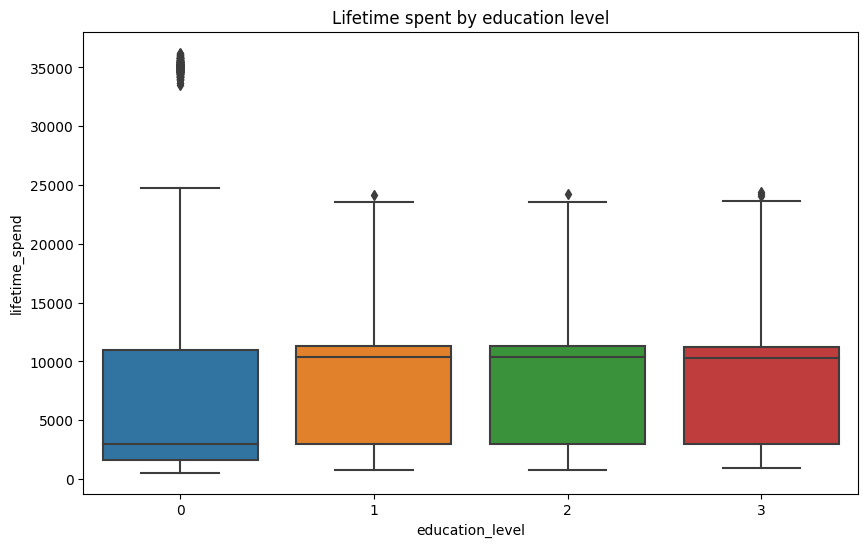

In [8]:
# plot boxplots for lifetime_spent for each group of customers given their education_level
sns.boxplot(x='education_level', y='lifetime_spend', data=Info)
plt.title('Lifetime spent by education level')
plt.show()

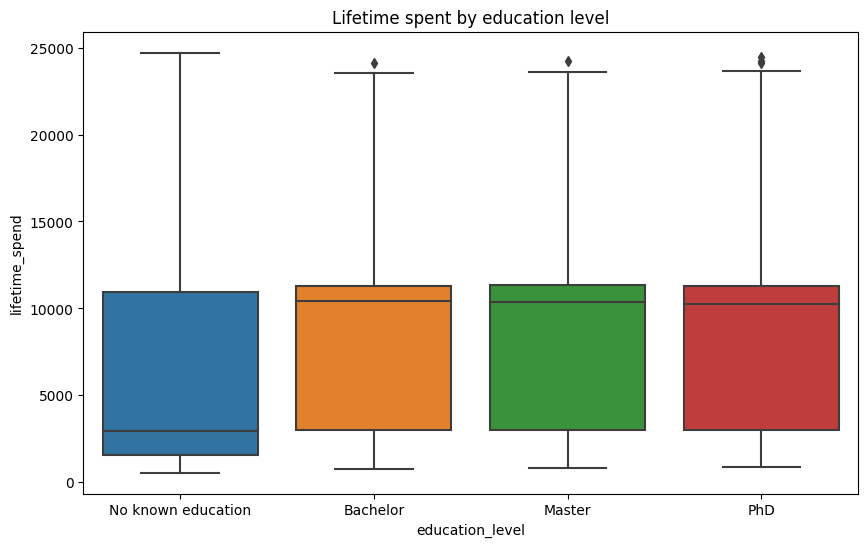

In [9]:
# plot boxplots for lifetime_spent for each group of customers given their education_level (only non-business customers)
# change the x axis labels (0 is No known education, 1 is Bachelor, 2 is Master, 3 is PhD)
sns.boxplot(x='education_level', y='lifetime_spend', data=Info[Info['is_business'] == 0])
plt.xticks([0, 1, 2, 3], ['No known education', 'Bachelor', 'Master', 'PhD'])
plt.title('Lifetime spent by education level')
plt.show()


In [10]:
reg_customers = Info[Info['is_business'] == 0]

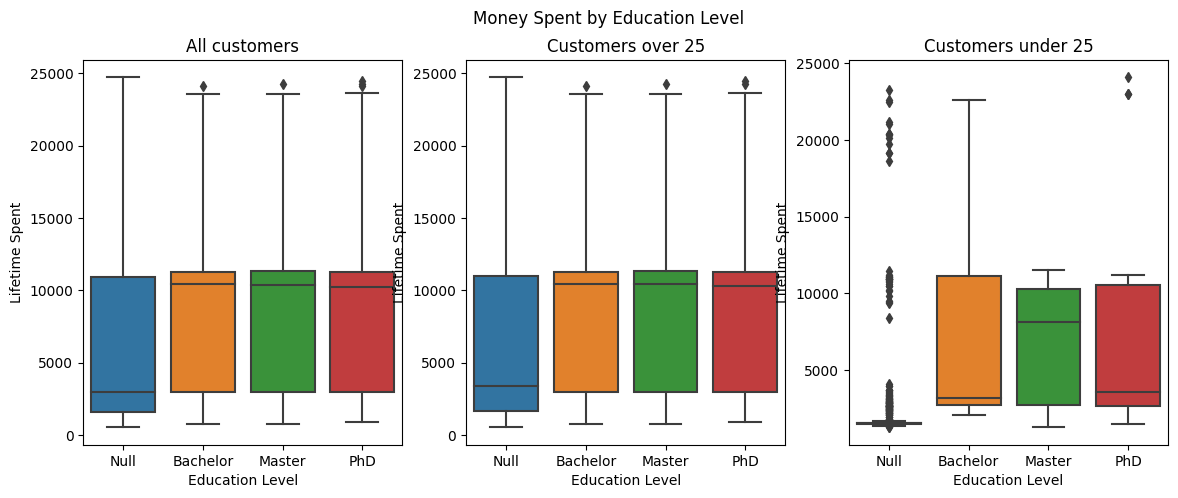

In [23]:
# plot boxplots for lifetime_spent for each group of customers given their education_level
# change the x axis labels (0 is No known education, 1 is Bachelor, 2 is Master, 3 is PhD) and set the vertically
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(14,5))
fig.suptitle('Money Spent by Education Level')

axes[0].set_title('All customers')
axes[1].set_title('Customers over 25')
axes[2].set_title('Customers under 25')

boxplot1 = sns.boxplot(x='education_level', y='lifetime_spend', data=reg_customers, ax=axes[0])
boxplot1.set_xlabel('Education Level')
boxplot1.set_ylabel('Lifetime Spent')

boxplot2 = sns.boxplot(x='education_level', y='lifetime_spend', data=reg_customers[reg_customers['age'] > 25], ax=axes[1])
boxplot2.set_xlabel('Education Level')
boxplot2.set_ylabel('Lifetime Spent')

boxplot3 = sns.boxplot(x='education_level', y='lifetime_spend', data=reg_customers[reg_customers['age'] < 25], ax=axes[2])
boxplot3.set_xlabel('Education Level')
boxplot3.set_ylabel('Lifetime Spent')

for ax in axes:
    ax.set_xticklabels(['Null', 'Bachelor', 'Master', 'PhD'])


plt.show()

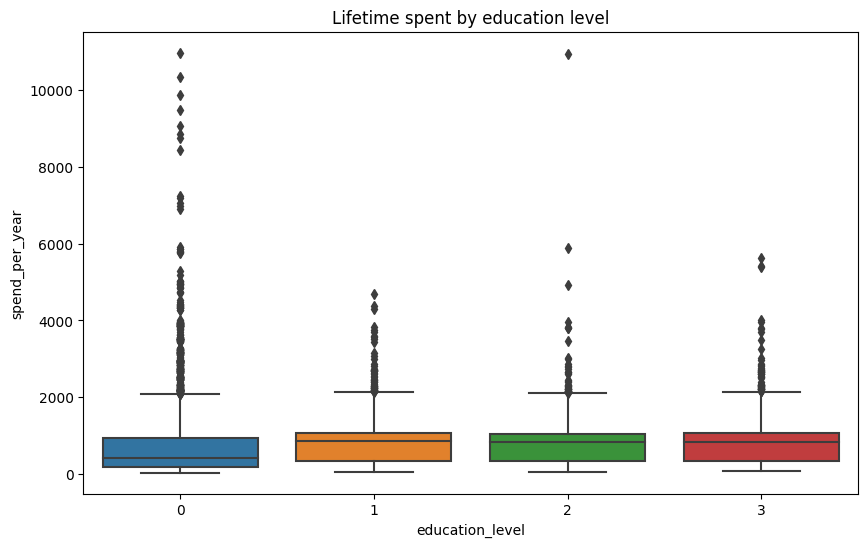

In [12]:
# plot boxplots for lifetime_spent for each group of customers given their education_level
sns.boxplot(x='education_level', y='spend_per_year', data=Info)
plt.title('Lifetime spent by education level')
plt.show()

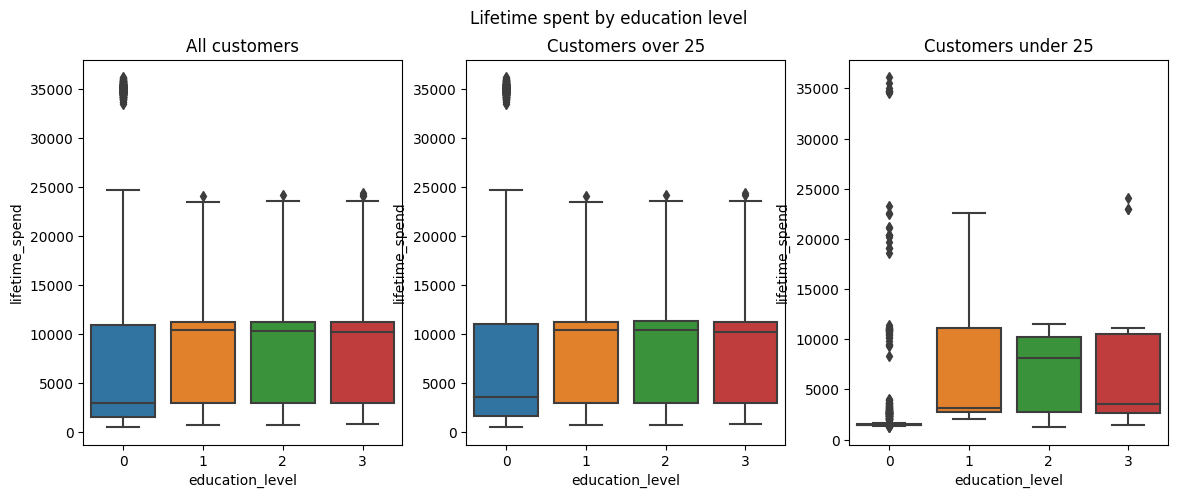

In [13]:
# plot boxplots for lifetime_spent for each group of customers given their education_level
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(14,5))
fig.suptitle('Lifetime spent by education level')
axes[0].set_title('All customers')
axes[1].set_title('Customers over 25')
axes[2].set_title('Customers under 25')
sns.boxplot(x='education_level', y='lifetime_spend', data=Info, ax=axes[0])
sns.boxplot(x='education_level', y='lifetime_spend', data=Info[Info['age'] > 25], ax=axes[1])
sns.boxplot(x='education_level', y='lifetime_spend', data=Info[Info['age'] < 25], ax=axes[2])
plt.show()

In [14]:
# count of customers over and under 25
Info[Info['age'] > 25 and ].shape[0], Info[Info['age'] < 25].shape[0]

SyntaxError: invalid syntax (1794418075.py, line 2)

In [ ]:
Info['customer_gender'].value_counts()

male      15090
female    14910
Name: customer_gender, dtype: int64

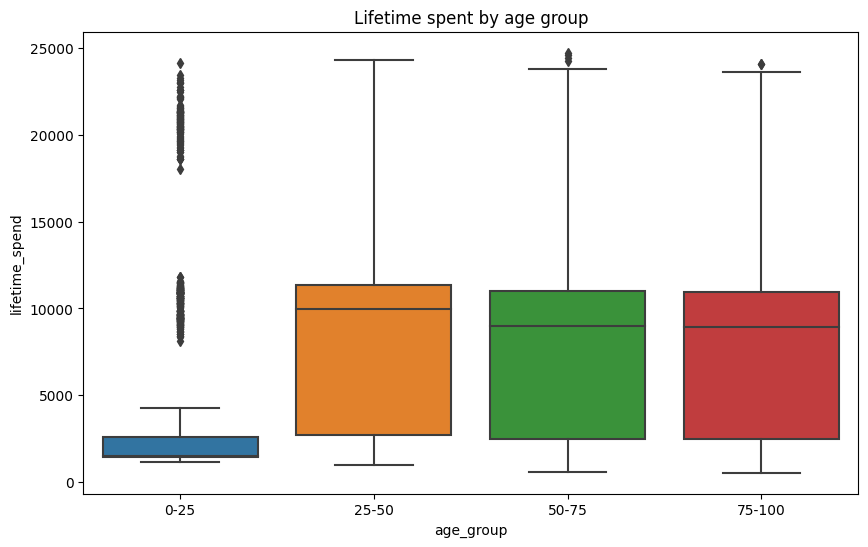

In [ ]:
# lets divide age into 4 groups
Info['age_group'] = pd.cut(Info['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])

# plot boxplots for lifetime_spent for each group of customers given their age_group and excluding supermarkets.
sns.boxplot(x='age_group', y='lifetime_spend', data=Info[Info['is_business'] == 0])
plt.title('Lifetime spent by age group')
plt.show()